<h1>Preprocessing</h1>
The Dataset are made in this way:
<ul>
    <li>objid       = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS</li>
    <li>ra          = Right Ascension angle (at J2000 epoch)</li>
    <li>dec         = Declination angle (at J2000 epoch)</li>
    <li>u           = Ultraviolet filter in the photometric system</li>
    <li>g           = Green filter in the photometric system</li>
    <li>r           = Red filter in the photometric system</li>
    <li>i           = Near Infrared filter in the photometric system</li>
    <li>z           = Infrared filter in the photometric system</li>
    <li>run         = Run Number used to identify the specific scan</li>
    <li>rereun      = Rerun Number to specify how the image was processed</li>
    <li>camcol      = Camera column to identify the scanline within the run</li>
    <li>field       = Field number to identify each field</li>
    <li>specobjid   = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)</li>
    <li>redshift    = redshift value based on the increase in wavelength</li>
    <li>plate       = plate ID, identifies each plate in SDSS</li>
    <li>mjd         = Modified Julian Date, used to indicate when a given piece of SDSS data was taken</li>
    <li>fiberid     = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation</li>
    <li>class       = object class (galaxy, star or quasar object)</li>
</ul>

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

Let's start loading the dataset in a dataframe

In [4]:
# dfStars = pd.read_csv('Skyserver_12_15_2020 3 45 07 AM.csv', na_values="?")
dfStars = pd.read_csv('FileCSV/star_classification.csv', na_values="?")
dfStars

FileNotFoundError: [Errno 2] No such file or directory: 'FileCSV/star_classification.csv'

In [3]:
dfStars.head().T

,0,1,2,3,4
objid,1237660961327743232.0,1237664879951151104.0,1237660961330430208.0,1237663478724297984.0,1237680272041378048.0
ra,135.689107,144.826101,142.18879,338.741038,345.282593
dec,32.494632,31.274185,35.582444,-0.402828,21.183866
u,23.87882,24.77759,25.26307,22.13682,19.43718
g,22.2753,22.83188,22.66389,23.77656,17.58028
r,20.39501,22.58444,20.60976,21.61162,16.49747
i,19.16573,21.16812,19.34857,20.50454,15.97711
z,18.79371,21.61427,18.94827,19.2501,15.54461
run,3606,4518,3606,4192,8102
rerun,301,301,301,301,301


Here I check the distribution of the Labeled-Class

In [4]:
dfStars['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

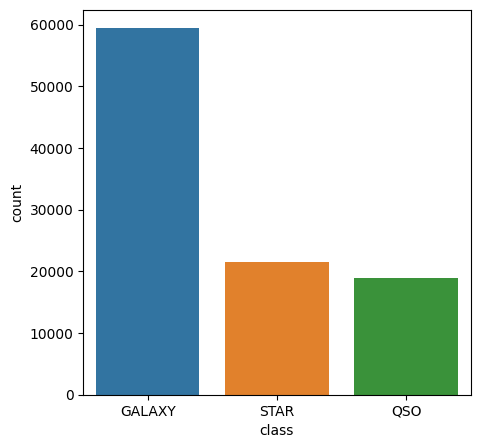

In [5]:
fig,axes = plt.subplots(1, 1, figsize=(5,5), sharey=True)
sns.countplot(x='class',data = dfStars, ax = axes, order = dfStars['class'].value_counts().index)
plt.show()

Check same info about the feature of the DataSet

In [6]:
dfStars.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
dfStars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  float64
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  float64
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 13.7+ MB


Check for Nan or Null value

In [8]:
dfStars.isna().sum(axis=0)

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Checking if there is some duplicate

In [9]:
dfStars[dfStars.duplicated(keep=False)]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


<h1>Normalization of the classed-class</h1>



In [3]:
# Normalize the classed-class with numerical data
dfStarsNormalize = dfStars
dfStarsNormalize['class'] = dfStarsNormalize['class'].replace({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

NameError: name 'dfStars' is not defined

<h1>Split the dataset in training set and test set.</h1>

In [11]:
# Split the dataset into features and classs
X = dfStarsNormalize.drop('class', axis=1)
y = dfStarsNormalize['class']
X.shape, y.shape

((100000, 17), (100000,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
print('Shape of the train and test set')
print(X_train.shape) # type: ignore
print(X_test.shape) # type: ignore
print()
print('Distribution of the labeled-classes')  
print()
print("Training Set")
print(pd.Series(y_train).value_counts())
print()
print("Test Set")
print(pd.Series(y_test).value_counts())

Shape of the train and test set
(70000, 17)
(30000, 17)

Distribution of the labeled-classes

Training Set
0    41636
1    15044
2    13320
Name: class, dtype: int64

Test Set
0    17809
1     6550
2     5641
Name: class, dtype: int64


<h1>Feature Selection</h1>

In [13]:
X_train.drop(['objid','run','rerun','camcol','field','fiberid'], axis = 1, inplace=True) # type: ignore

<h5>USING: mutual_info_regression</h5>

In [14]:
from sklearn.feature_selection import mutual_info_regression

# Calcola il coefficiente di informazione mutua per ogni feature
mi = mutual_info_regression(X_train, y_train)
mi.sort()

<h5>USING: f_regretion</h5>

In [15]:
from sklearn.feature_selection import f_regression

# Eseguiamo il test di ANOVA utilizzando f_regression
scores, pvalues = f_regression(X_train, y_train)

The following DataFrame shows the score achieved by each attribute:

In [16]:
dfScores = pd.DataFrame()
dfScores['ra'] = [scores[0], mi[0]]
dfScores['dec'] = [scores[1], mi[1]]
dfScores['u'] = [scores[2], mi[2]]
dfScores['g'] = [scores[3], mi[3]]
dfScores['r'] = [scores[4], mi[4]]
dfScores['i'] = [scores[5], mi[5]]
dfScores['z'] = [scores[6], mi[6]]
dfScores['specobjid'] = [scores[7], mi[7]]
dfScores['redshift'] = [scores[8], mi[8]]
dfScores['plate'] = [scores[9], mi[9]]
dfScores['mjd'] = [scores[10], mi[10]]
dfScores.index = ['f_regretion', 'mutual_info_regretion'] # type: ignore
dfScores.T

,f_regretion,mutual_info_regretion
ra,0.085929,0.039620
dec,218.452539,0.045158
u,3823.399010,0.075053
g,305.125852,0.100450
r,1659.220666,0.111461
i,6208.254359,0.119919
z,9269.757834,0.143494
specobjid,3402.116179,0.193700
redshift,28655.952271,0.270325
plate,3402.130505,0.294091


In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

# Crea un oggetto SelectKBest con il valore di k desiderato (ad esempio 10)
selector = SelectKBest(score_func=f_regression, k=10)

# Adatta il selector al dataset e seleziona le feature
X_selected = selector.fit_transform(X_train, y_train)

# Stampa le feature selezionate
print("Feature selezionate:")
print(X_train.columns[selector.get_support()]) # type: ignore

Feature selezionate:
Index(['dec', 'u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift', 'plate',
       'mjd'],
      dtype='object')


<h3>Delete Features</h3>
Now we need to drop the useless features

In [18]:
X_train.keys() # type: ignore

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift', 'plate',
       'mjd'],
      dtype='object')

Delete all the feautre with score < 0.1

In [19]:
X_train.drop(['ra', 'dec', 'u'], axis = 1, inplace=True) # type: ignore

<h1>Rebalance Dataset</h1>
I decide to use the method resample() for rebalance my DataSet.<br>
I add features into the two minority classes (STAR, QSO) until they reach the class with the higer number of examble (GALAXY). <br>
In the following snip of code I implement an over sampling using SMOTE.

In [20]:
from imblearn.over_sampling import SMOTE

# using oversampling with SMOTE to deal with imbalanced data
sm = SMOTE(random_state=42)
X_train_after_balancing, y_train_after_balancing = sm.fit_resample(X_train, y_train) # type: ignore

print(X_train_after_balancing.shape) # type: ignore
y_train_after_balancing.value_counts() # type: ignore

(124908, 8)


0    41636
1    41636
2    41636
Name: class, dtype: int64

In [21]:
# from sklearn.utils import resample
# 
# # I need to use a Dataframe with the labeled-class
# df_balanced = X_train
# df_balanced['class'] = y_train # type: ignore
# 
# # Split the dataset in 3 part, one for each class
# df_class_0 = df_balanced[df_balanced["class"] == 0] # type: ignore
# df_class_1 = df_balanced[df_balanced["class"] == 1] # type: ignore
# df_class_2 = df_balanced[df_balanced["class"] == 2] # type: ignore
# 
# # Find the majority class
# min_class = df_balanced["class"].value_counts().idxmin() # type: ignore
# 
# # We oversample the least numerous classes
# df_class_1_over = resample(df_class_1,
#                             replace=True, # Sample with replacement
#                             n_samples=len(df_class_0), # Match number in majority class
#                             random_state=42) # reproducible results
# df_class_2_over = resample(df_class_2,
#                             replace=True, # Sample with replacement
#                             n_samples=len(df_class_0), # Match number in majority class
#                             random_state=42) # reproducible results
# 
# # Join the tre dataframe
# df_balanced = pd.concat([df_class_0, df_class_1_over, df_class_2_over]) # type: ignore
# 
# # Mix the data
# df_balanced = df_balanced.sample(frac=1, random_state=42)
#
# df_balanced['class'].value_counts() # type: ignore
# print(df_balanced.shape) # type: ignore
# We need to split again the labeled-class from the other attribute inside the  ***df_balanced***
# X_train_after_balancing = df_balanced.drop('class', axis=1) # type: ignore
# y_train_after_balancing = df_balanced['class'] # type: ignore

<h1 style="font-weight: bold">CLASSIFICATION</h1>

<h2>KNeighborsClassifier</h2>
I tried to perform KNN with different k, for understand which is the best. <br>
I decided to use the euclidean and the manhattan distance, for make a comparison

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X_test_drop = X_test.drop(['ra', 'dec', 'u', 'objid','run','rerun','camcol','field','fiberid'], axis = 1) # type: ignore

k_neighbors = 100
metrics = ['euclidean', 'manhattan']

accuracy_total = []
for k in range(1, k_neighbors+1, 1):
    accuracy_k = []
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_after_balancing, y_train_after_balancing)
        y_predKNN = knn.predict(X_test_drop)
        accuracy = accuracy_score(y_test, y_predKNN)
        accuracy_k.append(accuracy)
        # print(f"For metric = {metric} and k = {k}:      ACCURACY = {accuracy}")
    accuracy_total.append(accuracy_k)

accuracy_df = pd.DataFrame(np.array(accuracy_total), columns=metrics)
k_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100], columns=['k'])
accuracy_join= k_df.join(accuracy_df)

The following snip of code shows us the trend of the KNN's accuracy for the euclidean and manhattan distance.<br> 
The graph for each distance it's almost the same. But the accurasy reach just the 67% in the peak, for k = 3.

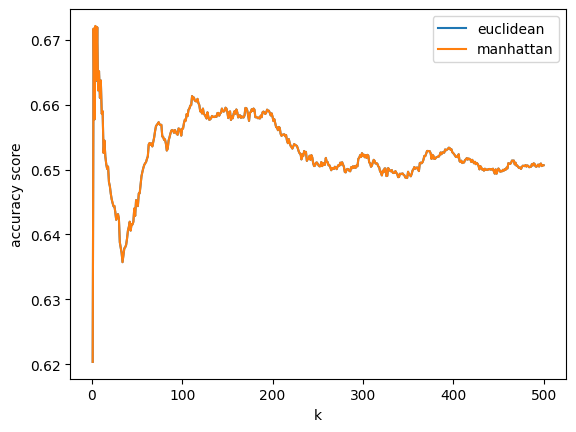

In [23]:
plt.plot(accuracy_join['k'], accuracy_join['euclidean'], label='euclidean')
plt.plot(accuracy_join['k'], accuracy_join['manhattan'], label='manhattan')

plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

In [24]:
accuracy_ed = []
accuracy_md = []

for i in range(200):
    accuracy_ed.append(accuracy_total[i][0])
    accuracy_md.append(accuracy_total[i][1])

max_index = max(enumerate(accuracy_ed), key=lambda x: x[1])[0]
print(f"Euclidean Distance: The value of k with the higher accuracy is {max_index}. Accurasy = {accuracy_ed[max_index]}")

max_index = max(enumerate(accuracy_md), key=lambda x: x[1])[0]
print(f"Manhattan Distance: The value of k with the higher accuracy is: {max_index}. Accurasy = {accuracy_md[max_index]}")

accuracyKNN = accuracy_md[max_index]

Euclidean Distance: The value of k with the higher accuracy is 3. Accurasy = 0.6721
Manhattan Distance: The value of k with the higher accuracy is: 3. Accurasy = 0.6721333333333334


<h2>Decision Tree</h2>

In [25]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_test_drop = X_test.drop(['ra', 'dec', 'u', 'objid','run','rerun','camcol','field','fiberid'], axis = 1) # type: ignore

# Create the model
clf = DecisionTreeClassifier()

# Fit the model
clf = clf.fit(X_train_after_balancing, y_train_after_balancing)
y_predDT = clf.predict(X_test_drop)

# Check the accuracy
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy: {accuracyDT:.2f}")

# Check the performance
scores = cross_val_score(clf, X_train_after_balancing, y_train_after_balancing, cv=5)
print(f"Performances: {scores}")
print(f"Average performance: {scores.mean():.2f}")



Accuracy: 0.96
Performances: [0.96705628 0.96941798 0.97454167 0.97386013 0.97345983]
Average performance: 0.97


<h1>Random Forest</h1>

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_test_drop = X_test.drop(['ra', 'dec', 'u', 'objid','run','rerun','camcol','field','fiberid'], axis = 1) # type: ignore

# Create the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train_after_balancing, y_train_after_balancing)

# Check the accuracy
y_predRF = clf.predict(X_test_drop)
accuracyRF = accuracy_score(y_test, y_predRF)
print(f"Accuracy: {accuracyRF:.2f}")

Accuracy: 0.98


Cross-validation scores: [0.97582259 0.97646305 0.97830438 0.98366824 0.9869506  0.98382836
 0.98486911 0.98615003 0.98566853 0.98502802]
Mean score: 0.9826752917825413


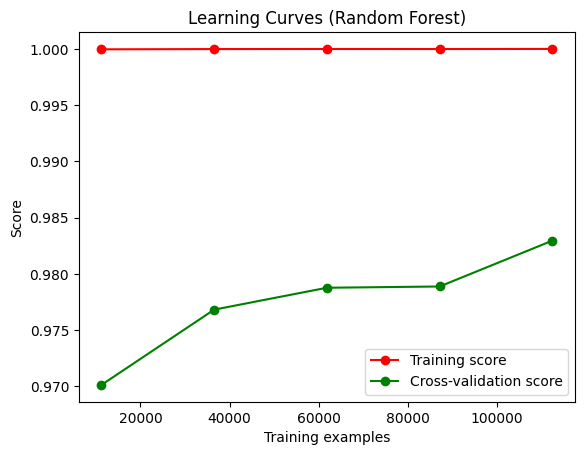

In [27]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Utilizza la cross-validation per valutare l'accuratezza del modello
scores = cross_val_score(clf, X_train_after_balancing, y_train_after_balancing, cv=10)

# Stampa i risultati della cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

# Disegna la curva di apprendimento del modello
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_after_balancing, y_train_after_balancing, cv=10)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label="Cross-validation score")

plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

<h2>Bayesian Classifier</h2>

In [28]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr

X_test_drop = X_test.drop(['ra', 'dec', 'u', 'objid','run','rerun','camcol','field','fiberid'], axis = 1) # type: ignore

# Create the model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train_after_balancing, y_train_after_balancing)

# Check the accuracy
y_predBC = gnb.predict(X_test_drop)
accuracyBC = accuracy_score(y_test, y_predBC)
print(f"Accuracy: {accuracyBC:.2f}")

Accuracy: 0.30


<h3>ACCURACY</h3>
Now we will analize the accuracy of all the tried classifier.<br>
We can note that the best algorithm is Random Forest


In [29]:
print(f"Accuracy of Random Forest: {accuracyRF:.2f}")
print(f"Accuracy of Decision Tree: {accuracyDT:.2f}")
print(f"Accuracy of KNN: {accuracyKNN:.2f}")
print(f"Accuracy of Bayesian Classifier: {accuracyBC:.2f}")

Accuracy of Random Forest: 0.98
Accuracy of Decision Tree: 0.96
Accuracy of KNN: 0.67
Accuracy of Bayesian Classifier: 0.30


<h1 style="font-weight: bold">Save The Model<h1>

<p style="size: 12pt">I'll save the model of Random Forest in a file, for using them in an external application</p>

In [30]:
import pickle

with open('starClassificatinApp/model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [31]:
X_train_after_balancing.keys()

Index(['g', 'r', 'i', 'z', 'specobjid', 'redshift', 'plate', 'mjd'], dtype='object')

<h1>Evaluation of the model</h1>

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcola la confusion matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)
print(confusion_matrix)